In [37]:
import os
import nibabel as nib
import numpy as np
from matplotlib import pyplot as plt
import math

In [67]:


def main(in_path):

    highest_value = 0

    max_values = list()

    image_list = list()

    
    #relevant_image_names = np.load("/Users/olath/Documents/GitHub/Master-thesis/Data_Experimentation/images_with_paths_file_0.npy",allow_pickle='TRUE').item()

    keys = list(relevant_image_names.keys())

    for subdir, dirs, files in os.walk(in_path):

        images_left = len(files)

        for file in files:
                           
                if (not file.startswith('._')): #and file[:-7] in keys:

                    img_nifti = nib.load(in_path+file)

                    img = np.array(img_nifti.dataobj)

                    max_value = img.mean()

                    max_values.append(max_value)

                    if max_value > highest_value:

                        print(max_value)

                        image = file

                        highest_value = max_value

                    images_left -= 1

                    if max_value > 22:
                         
                        image_list.append(int(file[:-7]))
                         


    return highest_value, image, max_values, image_list

test, test2, test3, test4 = main('/Volumes/Extreme SSD/ADNI_PROCESSED/')

print(test)
print(test2)

print(len(test4))
print(test4)
test4.sort()
print(test4)

6.536434
7.7220907
8.671292
28.766403
30.072933
30.625792
51.23427
57.325382
63.883823
63.883823
1644018.nii.gz
73
[25952, 40083, 49010, 55771, 64466, 73815, 84509, 108600, 110130, 149924, 153068, 186073, 19057, 26170, 53470, 60124, 70096, 116575, 117756, 209891, 1517526, 23591, 33393, 40152, 48751, 56574, 60268, 74471, 116599, 135395, 1472762, 1475316, 1644018, 13722, 17905, 19089, 40503, 49023, 71849, 78379, 99432, 116611, 138952, 173460, 185090, 1563023, 15948, 23593, 87699, 101816, 154520, 1541815, 17184, 26138, 32909, 41586, 54260, 71097, 84436, 144446, 147113, 162750, 166845, 173732, 1520554, 20519, 30862, 37161, 55275, 108155, 114997, 130789, 144447]
[13722, 15948, 17184, 17905, 19057, 19089, 20519, 23591, 23593, 25952, 26138, 26170, 30862, 32909, 33393, 37161, 40083, 40152, 40503, 41586, 48751, 49010, 49023, 53470, 54260, 55275, 55771, 56574, 60124, 60268, 64466, 70096, 71097, 71849, 73815, 74471, 78379, 84436, 84509, 87699, 99432, 101816, 108155, 108600, 110130, 114997, 116575

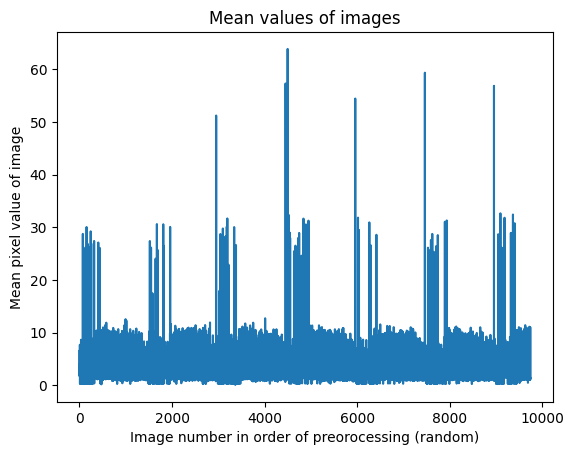

In [66]:
plt.plot(test3)

plt.title('Mean values of images')
plt.xlabel('Image number in order of preorocessing (random)')
plt.ylabel('Mean pixel value of image')

plt.show()

In [73]:
path = '/Volumes/Extreme SSD/ADNI_PROCESSED/1644018.nii.gz'

img_nifti = nib.load(path)

img = np.array(img_nifti.dataobj)

for bi in map(np.squeeze, np.split(img, len(img))):
    plt.hist2d(bi[:, 0], bi[0, :])

plt.title('Distribution of outliers')
plt.xlabel('Image number (smaller means older image)')
plt.ylabel('Amount of images')

plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

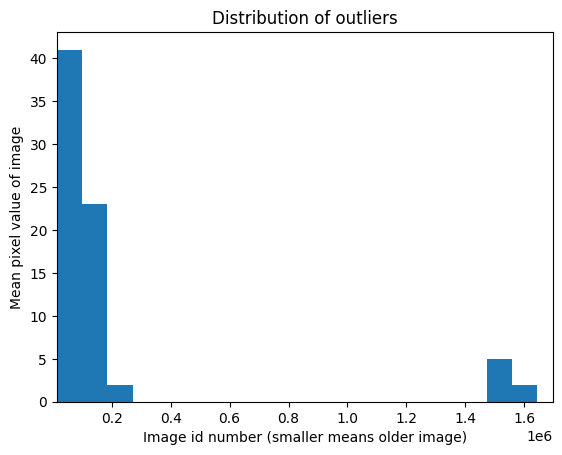

In [63]:
bins = np.linspace(math.ceil(min(test4)), 
                   math.floor(max(test4)),
                   20) # fixed number of bins

plt.xlim([min(test4), 1697558])

plt.hist(test4, bins=bins)
plt.title('Distribution of outliers')
plt.xlabel('Image number (smaller means older image)')
plt.ylabel('Amount of images')

plt.show()

In [25]:
image_names = list()
for image in test4:

    image_name = (image[:-7])
    image_names.append(image_name)

relevant_image_names = np.load("/Users/olath/Documents/GitHub/Master-thesis/Data_Experimentation/images_with_paths_file_2.npy",allow_pickle='TRUE').item()

match_counter = 0

for key in relevant_image_names:

    if key in image_names:

        #print('Match!')
        match_counter += 1

print(match_counter)

45
